# How to create dependencies between SoS steps

* **Difficulty level**: easy to intermediate
* **Time need to lean**: 30 minutes or less
* **Key points**:  
  * A numerically indexed step by default depends on its previous steps
  * A step can depend on steps that generate statically defined outputs
  * A step can depend on steps with `named_outputs(step)`
  * A step can depend on another step with `sos_step(step)` and `output_from(step)`
  * A step can depend on steps of another workflow with `sos_step(workflow)`
  * A step with `depends: sos_variable(var)` depends on another step that `share` the variable
  * A step can depend on steps that `provides` output through patten matching of file names

SoS provides a plethora of methods to build dependencies between steps. These dependencies creates DAGs of workflows based on which workflows are executed. These dependencies could be built statically before the execution of workflow, or be added during the execution of the workflow but the general idea is the same.

This tutorial summarizes how SoS steps are connected using very simple examples. The details of each method will be discussed later.

## Numerically indexed steps

In [3]:
%run -v0 -d num.dot
[1]
print(f'Executing {step_name}')

[2]
print(f'Executing {step_name}')

[3]
print(f'Executing {step_name}')

,default,Workflow ID 6e26f930a35ec6d1,Index #3,completed Ran for < 5 seconds


Executing 1
Executing 2
Executing 3


> num.dot (600 B):

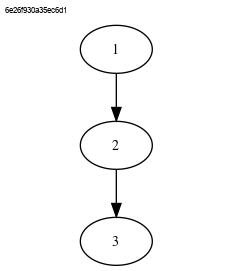

In [4]:
%preview num.dot

## Static output

In [12]:
!rm -f a.txt b.txt c.txt
%run -v0 -s force -d static.dot
[A]
output: 'a.txt'

_output.touch()
print(f'Generating {_output}')

[B]
input: 'a.txt'
output: 'b.txt'

_output.touch()
print(f'Generating {_output}')

[C]
depends: 'a.txt'
output: 'c.txt'

_output.touch()
print(f'Generating {_output}')


[default]
input: 'b.txt', 'c.txt'

Generating a.txt
Generating b.txt
Generating c.txt


> static.dot (1.9 KiB):

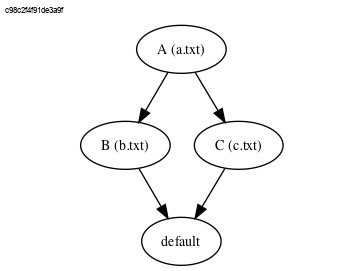

In [13]:
%preview static.dot

## Named output

In [15]:
!rm -f a.txt b.txt c.txt
%run -v0 -s force -d named.dot
[A]
output: A='a.txt'

_output.touch()
print(f'Generating {_output}')

[B]
input: named_output('A')
output: B='b.txt'

_output.touch()
print(f'Generating {_output}')

[C]
depends: named_output('A')
output: C='c.txt'

_output.touch()
print(f'Generating {_output}')


[default]
input: named_output('B'), named_output('C')

,default,Workflow ID 99bf712b7a3ef155,Index #12,completed Ran for 0 sec


Generating c.txt
Generating a.txt
Generating b.txt


> named.dot (1.5 KiB):

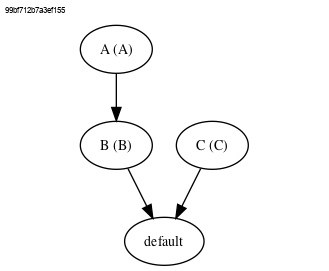

In [16]:
%preview named.dot

## Depend on another step

In [32]:
!rm -f a.txt b.txt c.txt
%run D -v0 -d sos_step.dot
[A]
print(f'Executing {step_name}')

[B]
depends: sos_step('A')
print(f'Executing {step_name}')

[C]
depends: sos_step('A')
print(f'Executing {step_name}')

[D]
depends: sos_step('B'), sos_step('C')
print(f'Executing {step_name}')

,D,Workflow ID b9ffefc84a65ee69,Index #20,completed Ran for 1 sec


Executing D


> sos_step.dot (1.5 KiB):

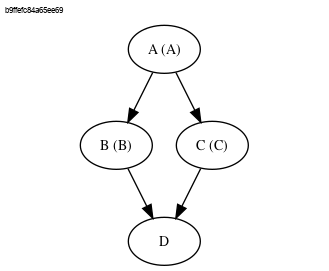

In [29]:
%preview sos_step.dot

## Depend on output of another step


In [33]:
!rm -f a.txt b.txt c.txt
%run D -v0 -d output_from.dot
[A]
output: 'a.txt'

_output.touch()
print(f'Generating {_output}')

[B]
input: output_from('A')
output: 'b.txt'

_output.touch()
print(f'Generating {_output}')

[C]
input: output_from('A')
output: C='c.txt'

_output.touch()
print(f'Generating {_output}')


[D]
input: output_from('B'), output_from('C')

,D,Workflow ID a2a3ebb109104389,Index #21,completed Ran for 1 sec


Generating a.txt
Generating b.txt
Generating c.txt


> output_from.dot (1.5 KiB):

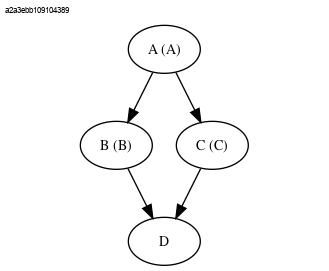

In [31]:
%preview output_from.dot

## Depend on another workflow

In [36]:
!rm -f a.txt b.txt c.txt
%run D -v0 -d sos_step_wf.dot
[A_1]
print(f'Executing {step_name}')

[A_2]
print(f'Executing {step_name}')

[B]
depends: sos_step('A')
print(f'Executing {step_name}')

[C]
depends: sos_step('A')
print(f'Executing {step_name}')

[D]
depends: sos_step('B'), sos_step('C')
print(f'Executing {step_name}')

,D,Workflow ID ebdbec54ddb99c60,Index #23,completed Ran for 0 sec


Executing A_1
Executing A_2
Executing D


> sos_step_wf.dot (1.9 KiB):

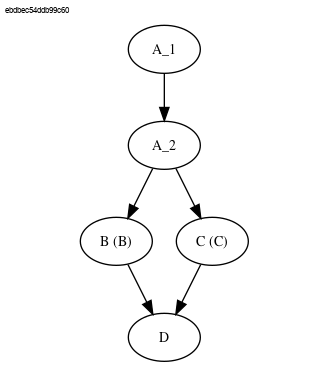

In [35]:
%preview sos_step_wf.dot

## Depends on shared variable

In [37]:
!rm -f a.txt b.txt c.txt
%run D -v0 -d shared.dot
[A: shared='A']
A=100
print(f'Executing {step_name}')

[B]
depends: sos_variable('A')
print(f'Executing {step_name}')

[C]
depends: sos_variable('A')
print(f'Executing {step_name}')

[D]
depends: sos_step('B'), sos_step('C')
print(f'Executing {step_name}')

,D,Workflow ID f2e6aea421d36ff1,Index #24,completed Ran for 0 sec


Executing A
Executing B
Executing C
Executing D


> shared.dot (1.5 KiB):

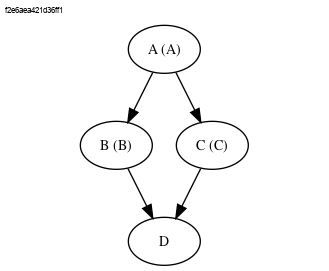

In [38]:
%preview shared.dot

## Depend on pattern matching

In [39]:
!rm -f a.txt b.txt c.txt
%run D -v0 -d pattern.dot

[A: provides='{filename}.txt']
_output.touch()
print(f'Generating {_output}')


[B]
input: 'a.txt'
print(f'Executing {step_name}')

[C]
input: 'b.txt'
print(f'Executing {step_name}')

[D]
depends: sos_step('B'), sos_step('C')
print(f'Executing {step_name}')

,D,Workflow ID 64db87d233c5285a,Index #25,completed Ran for 0 sec


Generating a.txt
Generating b.txt
Executing B
Executing C
Executing D


> pattern.dot (2.1 KiB):

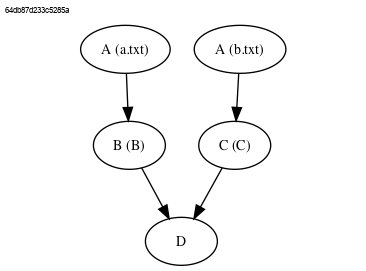

In [40]:
%preview pattern.dot

## Further reading
